## **CREDIT CARD FRAUD DETECTION**

# Importing the Reqiured Libraries

In [33]:
import pandas as pd
import numpy as np
from sklearn.utils import resample
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Loading The Dataset

In [6]:
cc = pd.read_csv('/content/drive/MyDrive/creditcard.csv')

In [7]:
cc.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
cc.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
cc.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


# PRE PROCESSING THE DATA

In [10]:
cc['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [13]:
lg = cc[cc.Class == 0]
fr = cc[cc.Class == 1]

In [14]:
print(lg.shape)
print(fr.shape)

(284315, 31)
(492, 31)


In [18]:
# statistical measures of the data
lg.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [19]:
fr.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

# DownSampling

In [15]:
maj_class = cc[cc['Class'] == 0]
min_class = cc[cc['Class'] == 1]

maj_downsampled = resample(maj_class,
                                replace=False,       # Without replacement
                                n_samples=len(min_class),  # Match minority class
                                random_state=42)     # For reproducibility

cc = pd.concat([maj_downsampled, min_class])

print(cc['Class'].value_counts())

0    492
1    492
Name: Class, dtype: int64


In [16]:
cc.shape

(984, 31)

In [17]:
cc.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,984.0,87899.782520,47991.767211,406.000000,45928.000000,80853.000000,134528.250000,171917.000000
V1,984.0,-2.309318,5.523248,-30.552380,-2.784711,-0.784459,1.125429,2.351891
V2,984.0,1.816713,3.675483,-8.402154,-0.150957,0.940617,2.798885,22.057729
V3,984.0,-3.535655,6.200540,-31.103685,-5.084967,-1.369045,0.225959,3.143387
V4,984.0,2.257353,3.207699,-4.519509,-0.140560,1.302623,4.202830,12.114672
V5,984.0,-1.544629,4.205316,-22.105532,-1.775001,-0.340291,0.492184,11.095089
V6,984.0,-0.725850,1.726953,-6.406267,-1.599839,-0.671683,0.073437,6.474115
V7,984.0,-2.777468,5.845730,-43.557242,-3.066415,-0.635248,0.286374,5.802537
V8,984.0,0.292773,4.859601,-41.044261,-0.228822,0.146863,0.867939,20.007208
V9,984.0,-1.271887,2.340829,-13.434066,-2.353917,-0.702318,0.192528,5.232322


# VISUALIZATION

In [20]:
cc_class_0 = cc[cc['Class'] == 0]
cc_class_1 = cc[cc['Class'] == 1]

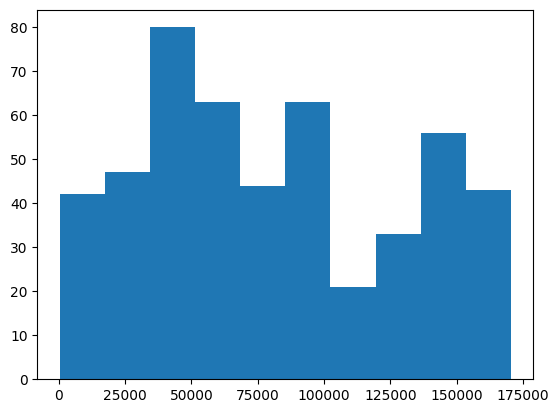

In [23]:
plt.hist(cc_class_1.Time)
plt.show()

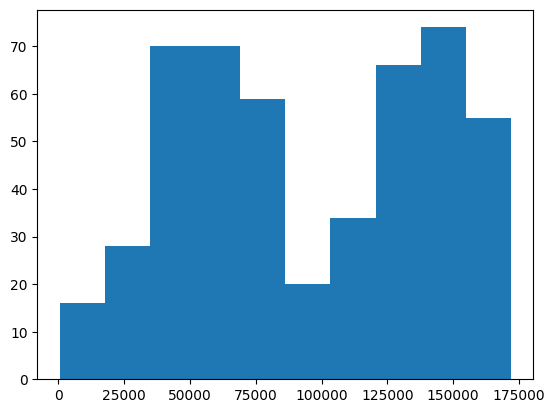

In [24]:
plt.hist(cc_class_0.Time)
plt.show()

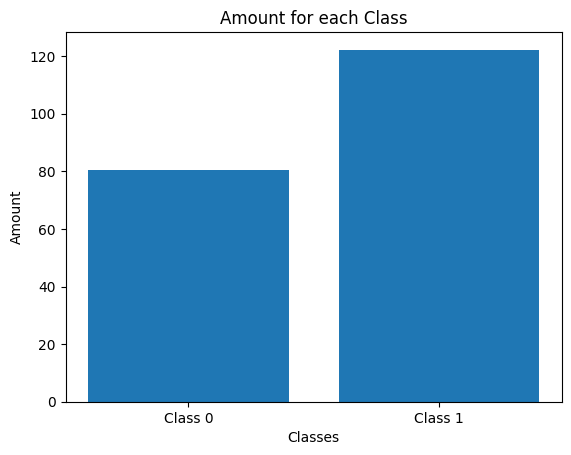

In [26]:
plt.bar([cc_class_0.Class.unique()[0], cc_class_1.Class.unique()[0]], [np.mean(cc_class_0.Amount), np.mean(cc_class_1.Amount)])
plt.xticks([cc_class_0.Class.unique()[0], cc_class_1.Class.unique()[0]], ['Class 0', 'Class 1'])
plt.xlabel('Classes')
plt.ylabel('Amount')
plt.title('Amount for each Class')
plt.show()

# Splitting The Data into Train and Test

In [27]:
y_data = cc.Class
x_data = cc.drop(['Class'], axis=1)

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.4, random_state=42)

# NORMALLIZATION OF DATA

In [30]:
std_scaler = StandardScaler()

In [31]:
X_train = std_scaler.fit_transform(x_train)

In [34]:
KNN = KNeighborsClassifier()
SVM = SVC()
NB = GaussianNB()
DTC = DecisionTreeClassifier()
RFC = RandomForestClassifier()
GBC = GradientBoostingClassifier()
LR = LogisticRegression()

models = [KNN, SVM, NB, DTC, RFC, GBC, LR]
X_test = std_scaler.fit_transform(x_test)

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(model, accuracy_score(y_test, y_pred))

KNeighborsClassifier() 0.9213197969543148
SVC() 0.9441624365482234
GaussianNB() 0.9263959390862944
DecisionTreeClassifier() 0.9010152284263959
RandomForestClassifier() 0.9314720812182741
GradientBoostingClassifier() 0.9289340101522843
LogisticRegression() 0.9416243654822335


# SUPPORT VECTOR MACHINE Has the highest Accuracy among other Methods

In [35]:
y_pred = SVM.predict(X_test)

# Model Evaluation

In [43]:
print("Accuracy__score :", accuracy_score(y_test, y_pred))

Accuracy__score : 0.9441624365482234


In [41]:
print("Precision__score :", precision_score(y_test, y_pred))

Precision__score : 0.9828571428571429


In [42]:
print("Recall__score :", recall_score(y_test, y_pred))

Recall__score : 0.900523560209424


In [40]:
print("F1__score :", f1_score(y_test, y_pred))

F1__score : 0.9398907103825136


# Confusion Matrix

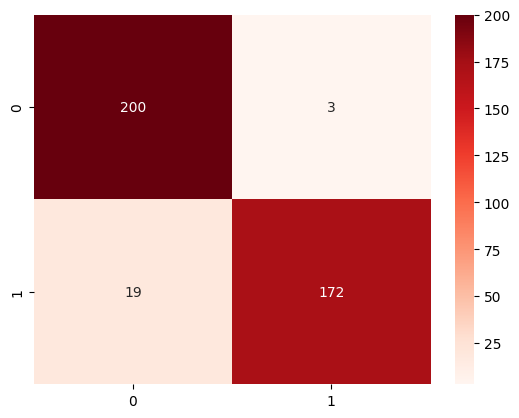

In [45]:
c_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(c_matrix, annot=True, fmt="d", cmap="Reds", cbar=True)
plt.show()

In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       203
           1       0.98      0.90      0.94       191

    accuracy                           0.94       394
   macro avg       0.95      0.94      0.94       394
weighted avg       0.95      0.94      0.94       394

